
### PPP Calculation of Csh, Total Sandstone Porosity, Sw in Payzone Using Laminated Aquifer Slope Method


Use this workflow having already computed CshAquifer(array),Rw,a,m,n from the picket plot in excel from the aquifer. Prepare arrays for:
- Gamma Ray values every 2ft of pay
- Nuetron and Density values every 2ft of pay
- Rt values every 2 ft of pay (no need to calculate Rss)

use https://apps.automeris.io/wpd/
link to github: https://github.com/AdrianSalinas98/Petroleum-Engineering-Repository



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#- Gamma Shale: 1 value (local max) **NEAR THE PAY ZONE**
#- Gamma Sand: 1 value (local min) **APPROXIMATING AQUIFER**
#- Gamma Aquifer: 1 value (local min)
#- Gamma Pay: Gamma ray of the Pay Zone **[Array]**
#- Csh Aquifer: shale concentration of Aquifer 1 value **MUST BE AT SAME DEPTH AS Gamma Aquifer**

#returns [Array]: CshPay: shale concentration along the payzone

def Csh(GammaShale,GammaAquifer,GammaPay,CshAquifer):
    slope = (1-CshAquifer)/(GammaShale-GammaAquifer) #1 value for each well
    CshPay = slope*(GammaPay-GammaShale)+1 #distribution for each 2ft of pay
    return CshPay

def CshNew(GammaShale,GammaSand,GammaPay):
    CshPay = (GammaPay - GammaSand)/(GammaShale - GammaSand) #distribution for each 2ft of pay
    return CshPay

#-----------------------------------------------------------------------------------------
#NPay: nuetron porosity every 2 ft of pay [Array]
#DPay: density every 2 ft of pay [Array]
#NShale: nuetron porosity of pure shale (1 value)
#DShale: density porosity of pure shale (1 value)
#CshPay: input the CshPay [Array] from above

#returns [Array]: PhiTotal: corrected, total porosity in the pay zone

def TotalPorosity(NPay,DPay,NShale,DShale,CshPay):
    PhiDcorrected = (DPay-(CshPay*DShale))/(1-CshPay)
    PhiNcorrected = (NPay-(CshPay*NShale))/(1-CshPay)
    PhiTotal = ( ((PhiNcorrected**2)+(PhiDcorrected**2))/2 )**.5
    return PhiTotal
#-----------------------------------------------------------------------------------------

#Rw: single value from picket plot
#Rt: DEEP resistivity every 2 ft of pay [Array]
#phiTotal: input array from above
#a,m,n single values from picket plot:

#returns [2-D Array]: of Sw and Shc

def Saturations(Rw,Rt,phiTotal,a,m,n):
    Sw = ((Rw/Rt)*(a/(phiTotal**m)))**(1/n)
    Shc = 1-Sw
    return np.array([Sw,Shc])
#-----------------------------------------------------------------------------------------

#For loops using arrays: GammaPay,Rw,Npay,Dpay,Rt values. Return distribution, weighted 

data = pd.read_csv('template.csv')
GammaPay = np.array(data['GammaPay'])
Rw = np.array(data['Rw'])
Rt = np.array(data['Rt'])
NPay = np.array(data['Npay'])
DPay = np.array(data['Dpay'])


#GammaAquifer is assumed with the I-1 log, so if your pay zone is a Haliburton log, subtract 15 from API reading
GammaShale = 120
GammaAquifer = 60
GammaSand = 45
CshAquifer = 0.1667
NShale = .42 #.402
DShale = .18 #.23
a = 1
m = 2 
n = 2.5


CshPay = np.array([])
CshPayNew = np.array([])
for i in range(len(GammaPay)):
    calc = Csh(GammaShale,GammaAquifer,GammaPay[i],CshAquifer)
    CshPay = np.append(CshPay,calc)
    
    calcNew = CshNew(GammaShale,GammaSand,GammaPay[i])
    CshPayNew = np.append(CshPayNew,calcNew)

PorosityPay = np.array([])
PorosityPayNew = np.array([])
for i in range(len(CshPay)):
    calc1 = TotalPorosity(NPay[i],DPay[i],NShale,DShale,CshPay[i])
    PorosityPay = np.append(PorosityPay,calc1)
    
    calc1New = TotalPorosity(NPay[i],DPay[i],NShale,DShale,CshPayNew[i])
    PorosityPayNew = np.append(PorosityPayNew,calc1New)
    
WaterSaturationPay = np.array([])
WaterSaturationPayNew = np.array([])
OilSaturationPay = np.array([])
for i in range(len(PorosityPay)):
    calc2 = Saturations(Rw[i],Rt[i],PorosityPay[i],a,m,n)
    WaterSaturationPay = np.append(WaterSaturationPay,calc2[0])
    OilSaturationPay = np.append(OilSaturationPay,calc2[1])
    
    calc2New =  Saturations(Rw[i],Rt[i],PorosityPayNew[i],a,m,n)
    WaterSaturationPayNew = np.append(WaterSaturationPayNew,calc2New[0])
    
# print(PorosityPay)
# print(WaterSaturationPay)

#data['PorosityPay'] = PorosityPay
#data['WaterSaturation'] = WaterSaturationPay


data['PorosityPayNew'] = PorosityPayNew
data['WaterSaturationPayNew'] = WaterSaturationPayNew
# print(PorosityPayNew)
# print(WaterSaturationPayNew)

data.to_csv('/Users/AdrianSalinas/Desktop/resources/Senior design/SandExport.csv')

data




,Depth,GammaPay,Rw,Rt,Npay,Dpay,Sidewall Porosity,Sidewall Saturation,PorosityPayNew,WaterSaturationPayNew
0,7564,92.142857,0.05,1.988099,0.237662,0.229870,NaN,NaN,0.227806,0.748447
1,7592,74.785714,0.05,1.457105,0.319481,0.311688,NaN,NaN,0.333838,0.624256
2,7594,74.785714,0.05,1.546519,0.319481,0.307792,NaN,NaN,0.329991,0.615240
3,7596,74.785714,0.05,1.547697,0.327273,0.307792,NaN,NaN,0.335039,0.607628
4,7598,74.785714,0.05,1.691354,0.307792,0.303896,NaN,NaN,0.318840,0.610148
5,7600,74.785714,0.05,1.692643,0.300000,0.307792,NaN,NaN,0.318170,0.610990
6,7602,70.928571,0.05,1.597416,0.319481,0.311688,NaN,NaN,0.328876,0.608969
7,7604,70.928571,0.05,1.507545,0.323377,0.311688,NaN,NaN,0.331305,0.619579
8,7606,69.964286,0.05,1.508886,0.338961,0.311688,NaN,NaN,0.340252,0.606296
9,7608,72.857143,0.05,1.466385,0.342857,0.303896,NaN,NaN,0.339545,0.614287


## Peicewise funtion for Depth Correlation: Well I-4 (MD to TVD relationship)

[7807.772 7810.104 7812.176 7814.249 7816.062 7826.166 7828.238 7830.311
      nan      nan      nan      nan      nan      nan      nan      nan
      nan      nan      nan      nan      nan      nan      nan      nan
      nan      nan      nan      nan      nan      nan]
[7588.0438168 7590.0012976 7591.7405344 7593.4806106 7595.0024428
 7603.4837404 7605.2229772 7606.9630534    0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.       ]


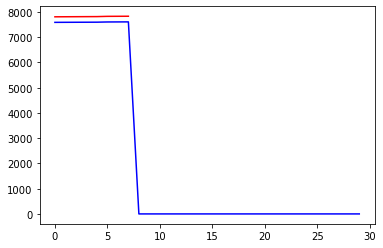

In [66]:
md = pd.read_csv('md.csv')

md.head()
MD = np.array(md['MD'])
TVD = np.array(md['TVD'])
depths = np.array(md['depths'])

newdepths = np.zeros(len(depths))
for i in range(0,len(depths)):
    if depths[i] < 6500.1:
        newdepths[i] = (0.968*depths[i] + 180.991)
    elif depths[i] > 6500.1 and depths[i] < 7275.1:
        newdepths[i] = (0.865*depths[i] + 845.35)
    elif depths[i] > 7275.1:
        newdepths[i] = (0.8394*depths[i] + 1034.2)
        
print(depths)    
print(newdepths)


plt.plot(depths, 'r-',label = 'MD')
plt.plot(newdepths, 'b-', label = 'TVD')

md['depthTVD'] = newdepths
md.to_csv('/Users/AdrianSalinas/Desktop/resources/Senior design/DepthExport.csv')

